In [1]:
import pandas as pd
import re
import nltk
from nltk import word_tokenize

In [3]:
nltk.download("averaged_perceptron_tagger")
nltk.download("stopwords")
nltk.download("punkt")
from nltk.corpus import stopwords
from collections import Counter

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\eagle\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\eagle\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\eagle\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [7]:

from nltk.tokenize import sent_tokenize,word_tokenize
from string import punctuation
from heapq import nlargest
from sklearn.feature_extraction.text import CountVectorizer

with open("NLP-TM.txt","r",encoding='utf8') as output:
    data=output.read()

In [9]:
def clean_text(text):
    text=re.sub('@\w+','',text)
    text=re.sub('https?://t\.co/\w+',' ',text)
    text=re.sub('&lt;|&lt;|&amp;|#'," ",text)
    return text
    
data=clean_text(data)

In [11]:
para = re.sub("[^A-Za-z." "]+"," ", data).lower()
para = re.sub("[0-9" "]+"," ", para)

para_stp=para.split(" ")

STOPWORDS = set(stopwords.words('english') + list(punctuation))

para_stp=[word for word in para_stp if word not in STOPWORDS]

para_stp=" ".join(para_stp)



In [13]:
para=para_stp

In [17]:
MIN_WORD_PROP, MAX_WORD_PROP = 0.1, 0.9
def word_freq(word_sentences):
    try:
        words = [word for sentence in word_sentences 
                     for word in sentence 
                         if word not in STOPWORDS]
        counter = Counter(words)
        limit = float(max(counter.values()))
        word_frequencies = {word: freq/limit 
                                for word,freq in counter.items()}
        # Drop words if too common or too uncommon
        word_frequencies = {word: freq 
                            for word,freq in word_frequencies.items() 
                                if freq > MIN_WORD_PROP 
                                and freq < MAX_WORD_PROP}
        return word_frequencies
    except Exception as e:
        print(e)

In [19]:
sentence_list=sent_tokenize(para)
w=[word_tokenize(wo) for wo in sentence_list]
word_freq(w)

{'cell': 0.33979475484606614,
 'new': 0.2120866590649943,
 'research': 0.217787913340935,
 'nih': 0.2006841505131129,
 'initiative': 0.22805017103762829,
 'understanding': 0.11516533637400228,
 'methods': 0.18129988597491448,
 'also': 0.12086659064994298,
 'neuroscience': 0.1322690992018244,
 'types': 0.15621436716077536,
 'technologies': 0.14481185860889395,
 'data': 0.33409350057012543,
 'human': 0.2542759407069555,
 'development': 0.14139110604332952,
 'tools': 0.16419612314709237,
 'neural': 0.11060433295324971,
 'activity': 0.15507411630558723,
 'imaging': 0.12200684150513112,
 'use': 0.1345496009122007,
 'models': 0.11060433295324971,
 'technology': 0.11516533637400228,
 'include': 0.11174458380843785,
 'function': 0.1322690992018244,
 'approaches': 0.13911060433295325}

In [21]:
def sentence_score(word_sentence, word_frequencies):
    return sum([ word_frequencies.get(word,0) 
                    for word in word_sentence])

In [23]:

def text_summarisation(text:str,num_sen=3):
    
    text=text.lower()
    
    sent=sent_tokenize(text)
    
    words=[word_tokenize(word) for word in sent]
    
    word_frequencies=word_freq(words)
    
    scores=[sentence_score(word, word_frequencies) for word in words]
    
    word_scores=list(zip(sent,scores))
    
    top_sentence_scores = nlargest(num_sen, word_scores, key=lambda t: t[1])
    
    return [t[0] for t in top_sentence_scores]

text_summarisation(para,2)

['still steps could facilitate progress toward open science environment brain initiative example processing stage data stored metadata included laboratories use data standard point data released public code released public fund data storage practically speaking straightforward first step implement nih brain initiative data sharing policy nih brain initiative funded grantees collaborators notify team members outset brain initiative funded studies data eventually made public adhering relevant standards data emerges ensure careful curation earliest stages project eliminates time consuming costly data organization later.',
 'census brain cell types foundational provides unique framework understand brain function development raises fundamental issues cell diversity relates function brain diverse parts relate one another parts alone together contribute function cell basic unit defining function ultimately defining behavior dysfunction cell type brain concept even useful research enabling for

In [25]:
######################### pos tagging ##################
STOPWORDS = set(stopwords.words('english') + list(punctuation))
def pos_tagging(text):
    text=text.lower()
    words=word_tokenize(text)
    Lwords=[word for word in words if len(word)>3 ]
    print(Lwords)
    Lwords=[lw for lw in Lwords if lw not in STOPWORDS]
    pos_tag_words=nltk.pos_tag(Lwords)
    return pos_tag_words

print(pos_tagging(para))

['article', 'cell', 'national', 'institutes', 'health', 'funded', 'researchers', 'described', 'used', 'advanced', 'genetic', 'engineering', 'techniques', 'transform', 'bacterial', 'protein', 'research', 'tool', 'help', 'monitor', 'serotonin', 'transmission', 'greater', 'fidelity', 'current', 'methods.preclinical', 'experiments', 'primarily', 'mice', 'showed', 'sensor', 'could', 'detect', 'subtle', 'real', 'time', 'changes', 'brain', 'serotonin', 'levels', 'sleep', 'fear', 'social', 'interactions', 'well', 'test', 'effectiveness', 'psychoactive', 'drugs.the', 'study', 'funded', 'part', 'brain', 'research', 'advancing', 'innovative', 'neurotechnologies', 'brain', 'initiative', 'aims', 'revolutionize', 'understanding', 'brain', 'healthy', 'disease', 'conditions.the', 'study', 'researchers', 'tian', 'principal', 'investigator', 'university', 'california', 'davis', 'school', 'medicine', 'current', 'methods', 'detect', 'broad', 'changes', 'serotonin', 'signaling', 'study', 'researchers', 'tr

In [27]:
#####################################################
######### bag of words #############################

bag_of_words_model = CountVectorizer()

print(bag_of_words_model.fit_transform(sentence_list).todense()) 

bag_of_word_df=pd.DataFrame(bag_of_words_model.fit_transform(sentence_list).todense())

bag_of_word_df.columns = sorted(bag_of_words_model.vocabulary_)
bag_of_word_df.head()

bag_of_words_model_small = CountVectorizer(max_features=5)
bag_of_word_df_small = pd.DataFrame(bag_of_words_model_small.fit_transform(sentence_list).todense())
bag_of_word_df_small.columns = sorted(bag_of_words_model_small.vocabulary_)
bag_of_word_df_small.head()

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


,brain,cell,data,human,initiative
0,4,1,0,0,1
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0


In [33]:
##### count vectorizer#############################

count_vector=CountVectorizer()

count_fit=count_vector.fit_transform(sentence_list)

print(count_vector.vocabulary_)

{'article': 289, 'cell': 553, 'national': 2607, 'institutes': 2045, 'health': 1802, 'funded': 1683, 'researchers': 3453, 'described': 1064, 'used': 4304, 'advanced': 104, 'genetic': 1718, 'engineering': 1342, 'techniques': 4027, 'transform': 4164, 'bacterial': 372, 'protein': 3229, 'new': 2700, 'research': 3451, 'tool': 4113, 'may': 2394, 'help': 1808, 'monitor': 2536, 'serotonin': 3659, 'transmission': 4180, 'greater': 1768, 'fidelity': 1567, 'current': 958, 'methods': 2451, 'preclinical': 3090, 'experiments': 1479, 'primarily': 3130, 'mice': 2456, 'showed': 3696, 'sensor': 3643, 'could': 910, 'detect': 1080, 'subtle': 3926, 'real': 3323, 'time': 4092, 'changes': 572, 'brain': 462, 'levels': 2248, 'sleep': 3732, 'fear': 1550, 'social': 3743, 'interactions': 2074, 'well': 4408, 'test': 4045, 'effectiveness': 1247, 'psychoactive': 3248, 'drugs': 1214, 'the': 4051, 'study': 3899, 'part': 2900, 'nih': 2717, 'advancing': 108, 'innovative': 2029, 'neurotechnologies': 2689, 'initiative': 202

In [35]:

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_model = TfidfVectorizer()
print(tfidf_model.fit_transform(sentence_list).todense())



[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [37]:
tfidf_df = pd.DataFrame(tfidf_model.fit_transform(sentence_list).todense())
tfidf_df.columns = sorted(tfidf_model.vocabulary_)
tfidf_df.head()

# TFIDF for top 5 frequent terms
tfidf_model_small = TfidfVectorizer(max_features=5)
tfidf_df_small = pd.DataFrame(tfidf_model_small.fit_transform(sentence_list).todense())
tfidf_df_small.columns = sorted(tfidf_model_small.vocabulary_)
tfidf_df_small.head()

,brain,cell,data,human,initiative
0,0.867395,0.341743,0.0,0.0,0.361714
1,0.000000,0.000000,0.0,0.0,0.000000
2,0.000000,0.000000,0.0,0.0,0.000000
3,0.000000,0.000000,0.0,0.0,0.000000
4,0.000000,0.000000,0.0,0.0,0.000000


In [41]:
def stemming(word_list):
    word_list=word_list.split(" ")
    stemmer = nltk.stem.PorterStemmer()
    Lwords=[lw for lw in word_list if lw not in STOPWORDS]
    stem_list=[]
    for i in Lwords:
        #print(stemmer.stem(i))
        stem_list.append([i,stemmer.stem(i)])
    return stem_list
 
stem_list=stemming(para)

print(stem_list[:100])


[['article', 'articl'], ['cell', 'cell'], ['national', 'nation'], ['institutes', 'institut'], ['health', 'health'], ['funded', 'fund'], ['researchers', 'research'], ['described', 'describ'], ['used', 'use'], ['advanced', 'advanc'], ['genetic', 'genet'], ['engineering', 'engin'], ['techniques', 'techniqu'], ['transform', 'transform'], ['bacterial', 'bacteri'], ['protein', 'protein'], ['new', 'new'], ['research', 'research'], ['tool', 'tool'], ['may', 'may'], ['help', 'help'], ['monitor', 'monitor'], ['serotonin', 'serotonin'], ['transmission', 'transmiss'], ['greater', 'greater'], ['fidelity', 'fidel'], ['current', 'current'], ['methods.preclinical', 'methods.preclin'], ['experiments', 'experi'], ['primarily', 'primarili'], ['mice', 'mice'], ['showed', 'show'], ['sensor', 'sensor'], ['could', 'could'], ['detect', 'detect'], ['subtle', 'subtl'], ['real', 'real'], ['time', 'time'], ['changes', 'chang'], ['brain', 'brain'], ['serotonin', 'serotonin'], ['levels', 'level'], ['sleep', 'sleep'

In [47]:
nltk.download('wordnet')
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\eagle\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [51]:
words_new=["running","runs","ran"]
for w in words_new:
    print(lemmatizer.lemmatize(w))

running
run
ran


In [43]:
################# lemmitizer


def lemmit(words):
    word_list=words.split(" ")
    lemmatizer = WordNetLemmatizer()
    Lwords=[lw for lw in word_list if lw not in STOPWORDS]
    lem_list=[]
    for i in Lwords:
        lem_list.append([i,lemmatizer.lemmatize(i)])
        
    return lem_list

lem_list=lemmit(para)
print(lem_list[:100])

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\eagle\AppData\Roaming\nltk_data...


[['article', 'article'], ['cell', 'cell'], ['national', 'national'], ['institutes', 'institute'], ['health', 'health'], ['funded', 'funded'], ['researchers', 'researcher'], ['described', 'described'], ['used', 'used'], ['advanced', 'advanced'], ['genetic', 'genetic'], ['engineering', 'engineering'], ['techniques', 'technique'], ['transform', 'transform'], ['bacterial', 'bacterial'], ['protein', 'protein'], ['new', 'new'], ['research', 'research'], ['tool', 'tool'], ['may', 'may'], ['help', 'help'], ['monitor', 'monitor'], ['serotonin', 'serotonin'], ['transmission', 'transmission'], ['greater', 'greater'], ['fidelity', 'fidelity'], ['current', 'current'], ['methods.preclinical', 'methods.preclinical'], ['experiments', 'experiment'], ['primarily', 'primarily'], ['mice', 'mouse'], ['showed', 'showed'], ['sensor', 'sensor'], ['could', 'could'], ['detect', 'detect'], ['subtle', 'subtle'], ['real', 'real'], ['time', 'time'], ['changes', 'change'], ['brain', 'brain'], ['serotonin', 'serotoni

In [53]:
from wordcloud import WordCloud

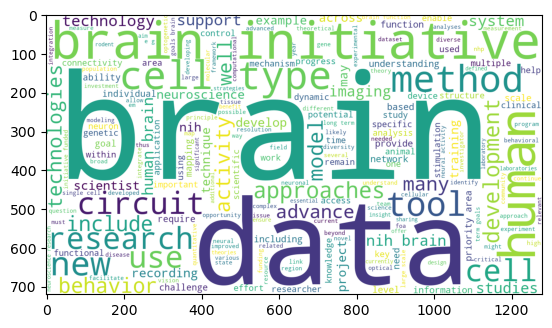

In [57]:
#list_of_words=para.split(" ")
#review_words=[words for words in list_of_words ]

#review_para=" ".join(review_words)

import matplotlib.pyplot as plt

word_cloud=WordCloud(
        background_color="white",
        width=1280,
        height=720
    ).generate(para)

plt.imshow(word_cloud)
